# Decision Trees

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import drive
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, log_loss

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
hr_path = '/content/gdrive/MyDrive/Datasets/human-resources-analytics/HR_comma_sep.csv'

hr = pd.read_csv(hr_path)
hr_dum = pd.get_dummies(hr, drop_first=True)
hr_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   Department_RandD        14999 non-null  uint8  
 9   Department_accounting   14999 non-null  uint8  
 10  Department_hr           14999 non-null  uint8  
 11  Department_management   14999 non-null  uint8  
 12  Department_marketing    14999 non-null  uint8  
 13  Department_product_mng  14999 non-null  uint8  
 14  Department_sales        14999 non-null

In [ ]:
X = hr_dum.drop('left', axis = 1)
y = hr_dum['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = 0.7, random_state = 2022)

dtc = DecisionTreeClassifier(random_state=2022, max_depth = 3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2022)

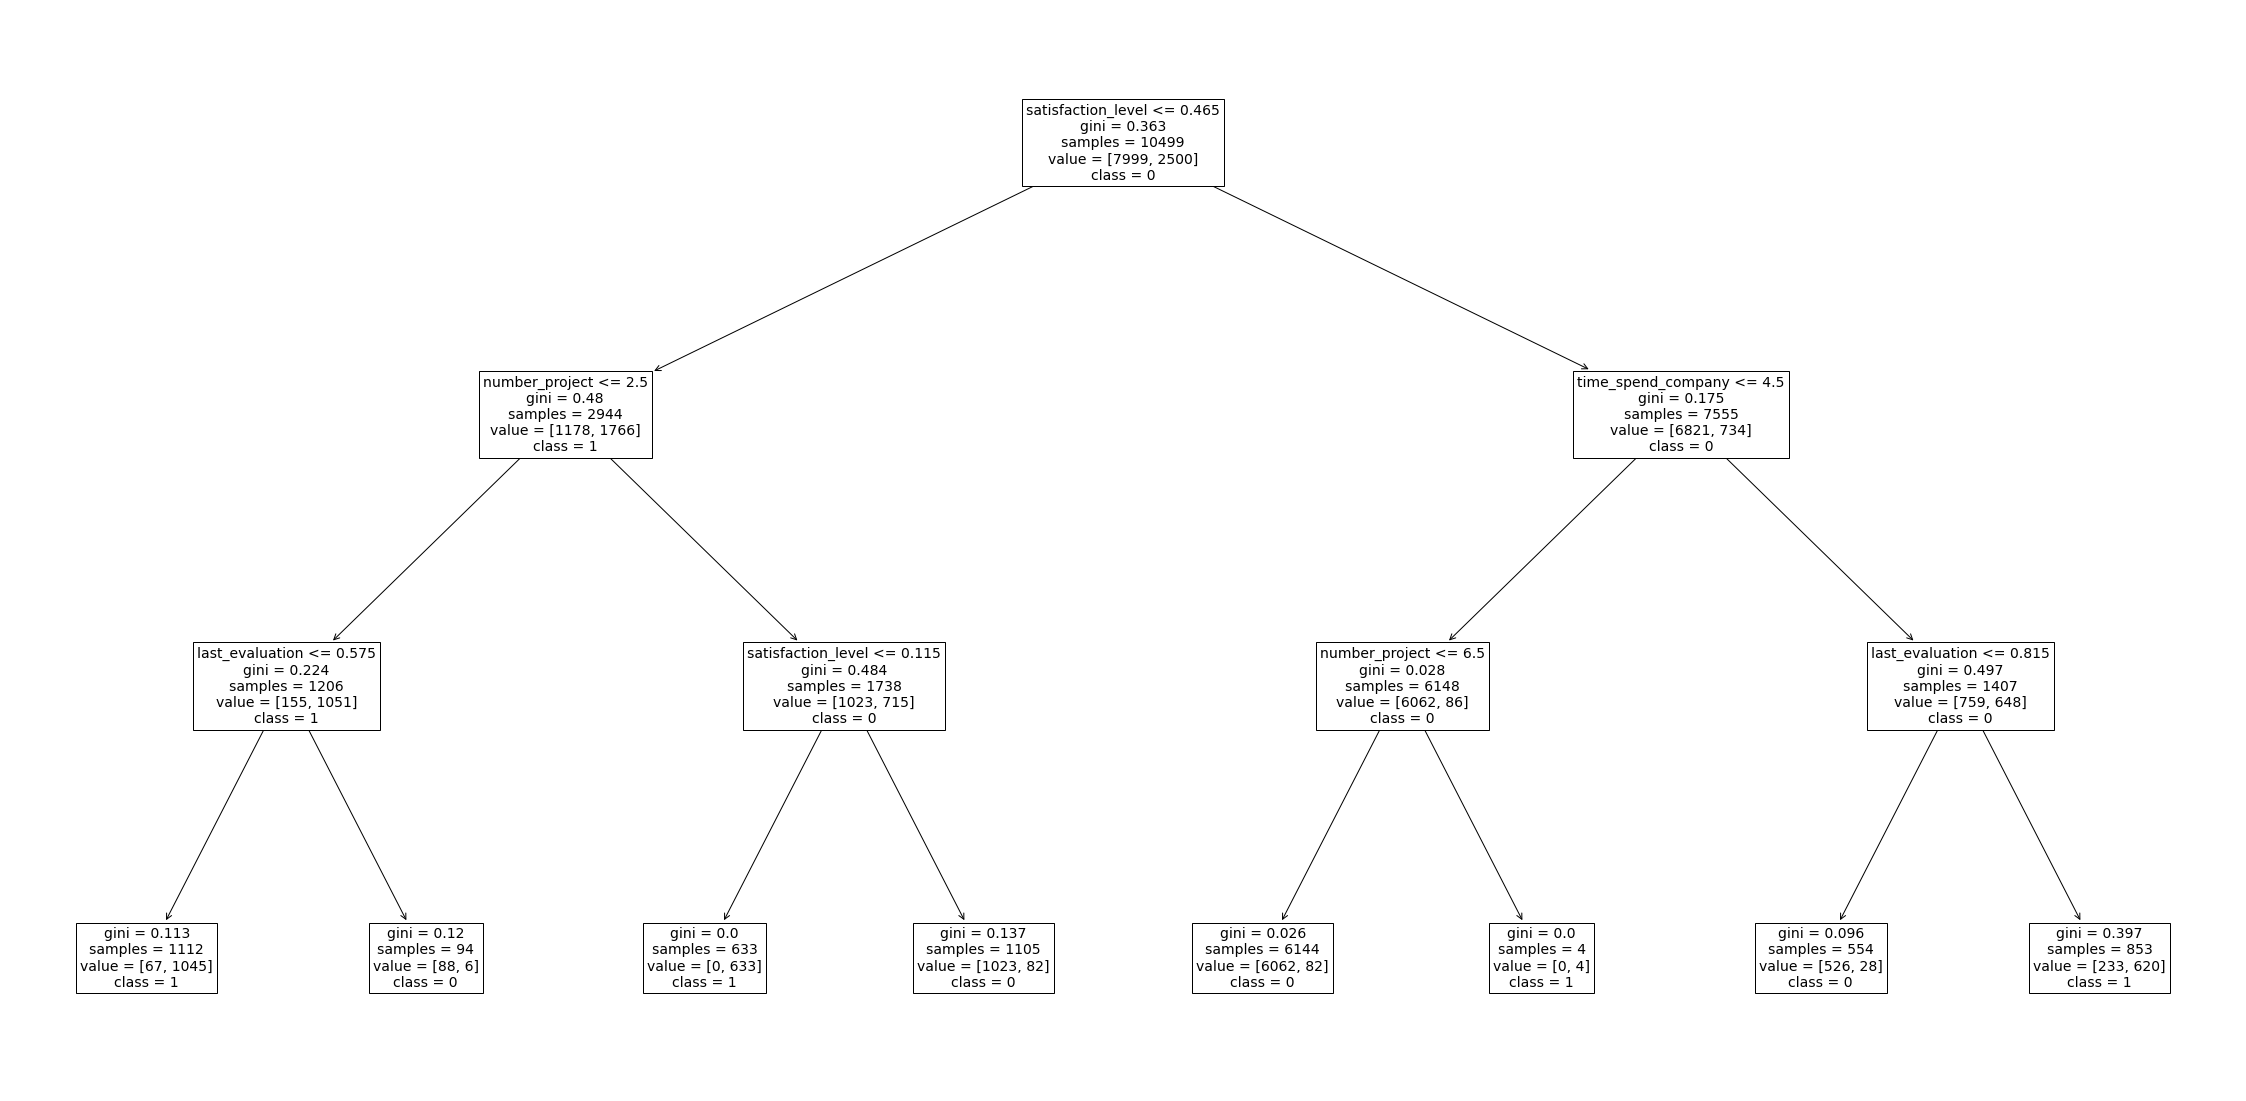

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (40,20))
plot_tree(dtc, feature_names = X.columns, class_names = ['0', '1'], fontsize = 14 )
plt.show()

In [ ]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

0.9526666666666667


In [ ]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

0.9640168889564187


In [ ]:
# With GridSearch CV
dtc = DecisionTreeClassifier(random_state = 2022)
params = {'max_depth':[2,3,4,5, None],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[1,5,10]}
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
gcv = GridSearchCV(dtc, param_grid = params, verbose = 3, cv = kfold, scoring = 'roc_auc')        
gcv.fit(X,y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.910 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.907 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.910 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.907 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.906 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.910 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.907 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.910 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.907 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, m

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=3)

In [ ]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.9852312475055124


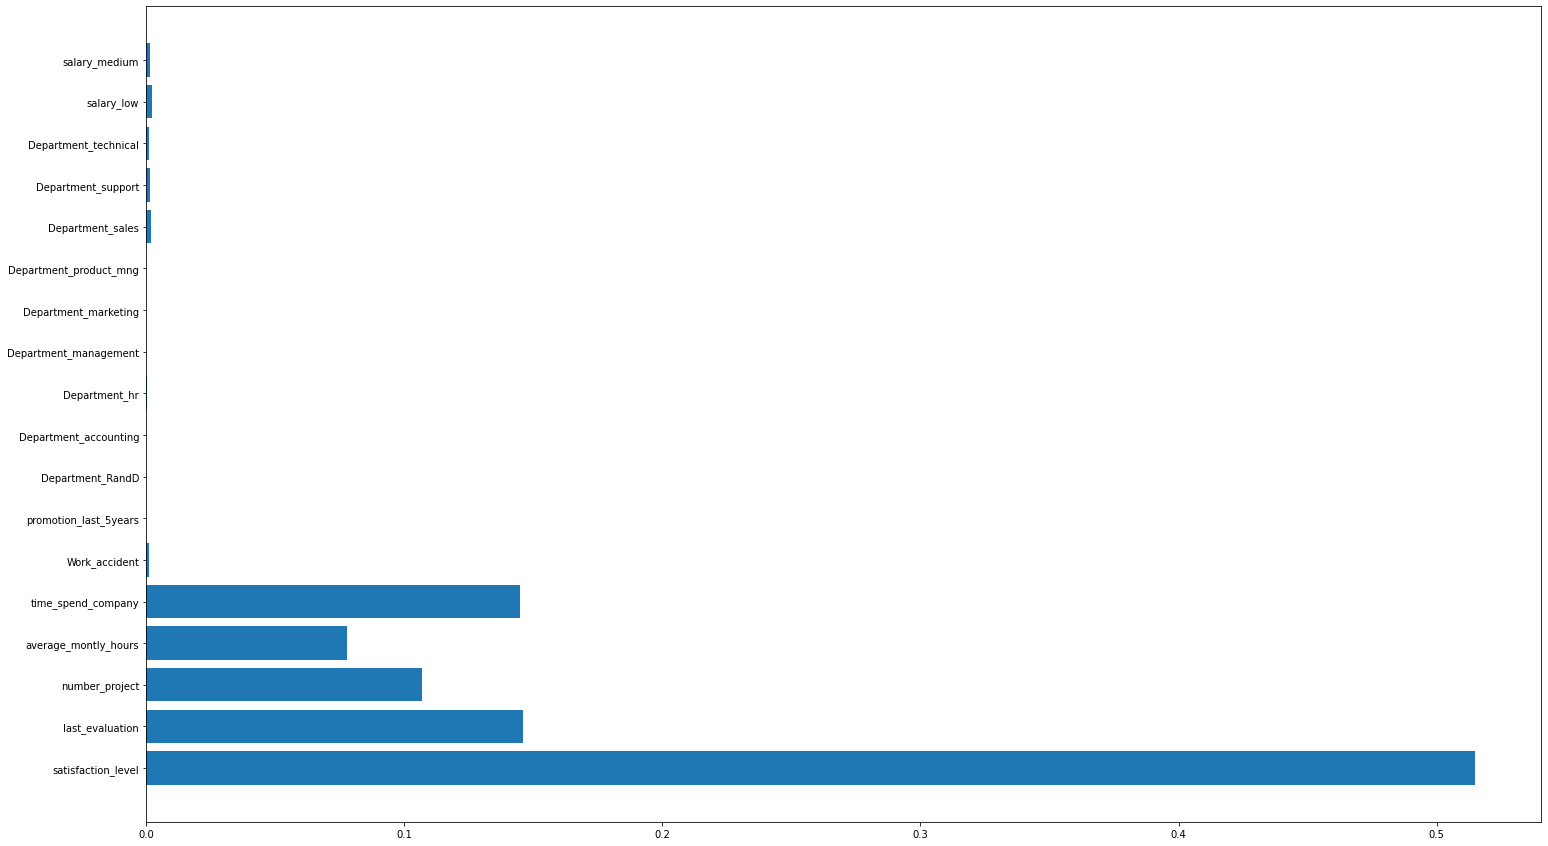

In [ ]:
# we will plot the feature importance plot for hr dataset

best_model = gcv.best_estimator_
plt.figure(figsize=(25,15))
plt.barh(best_model.feature_names_in_,best_model.feature_importances_)
plt.show()

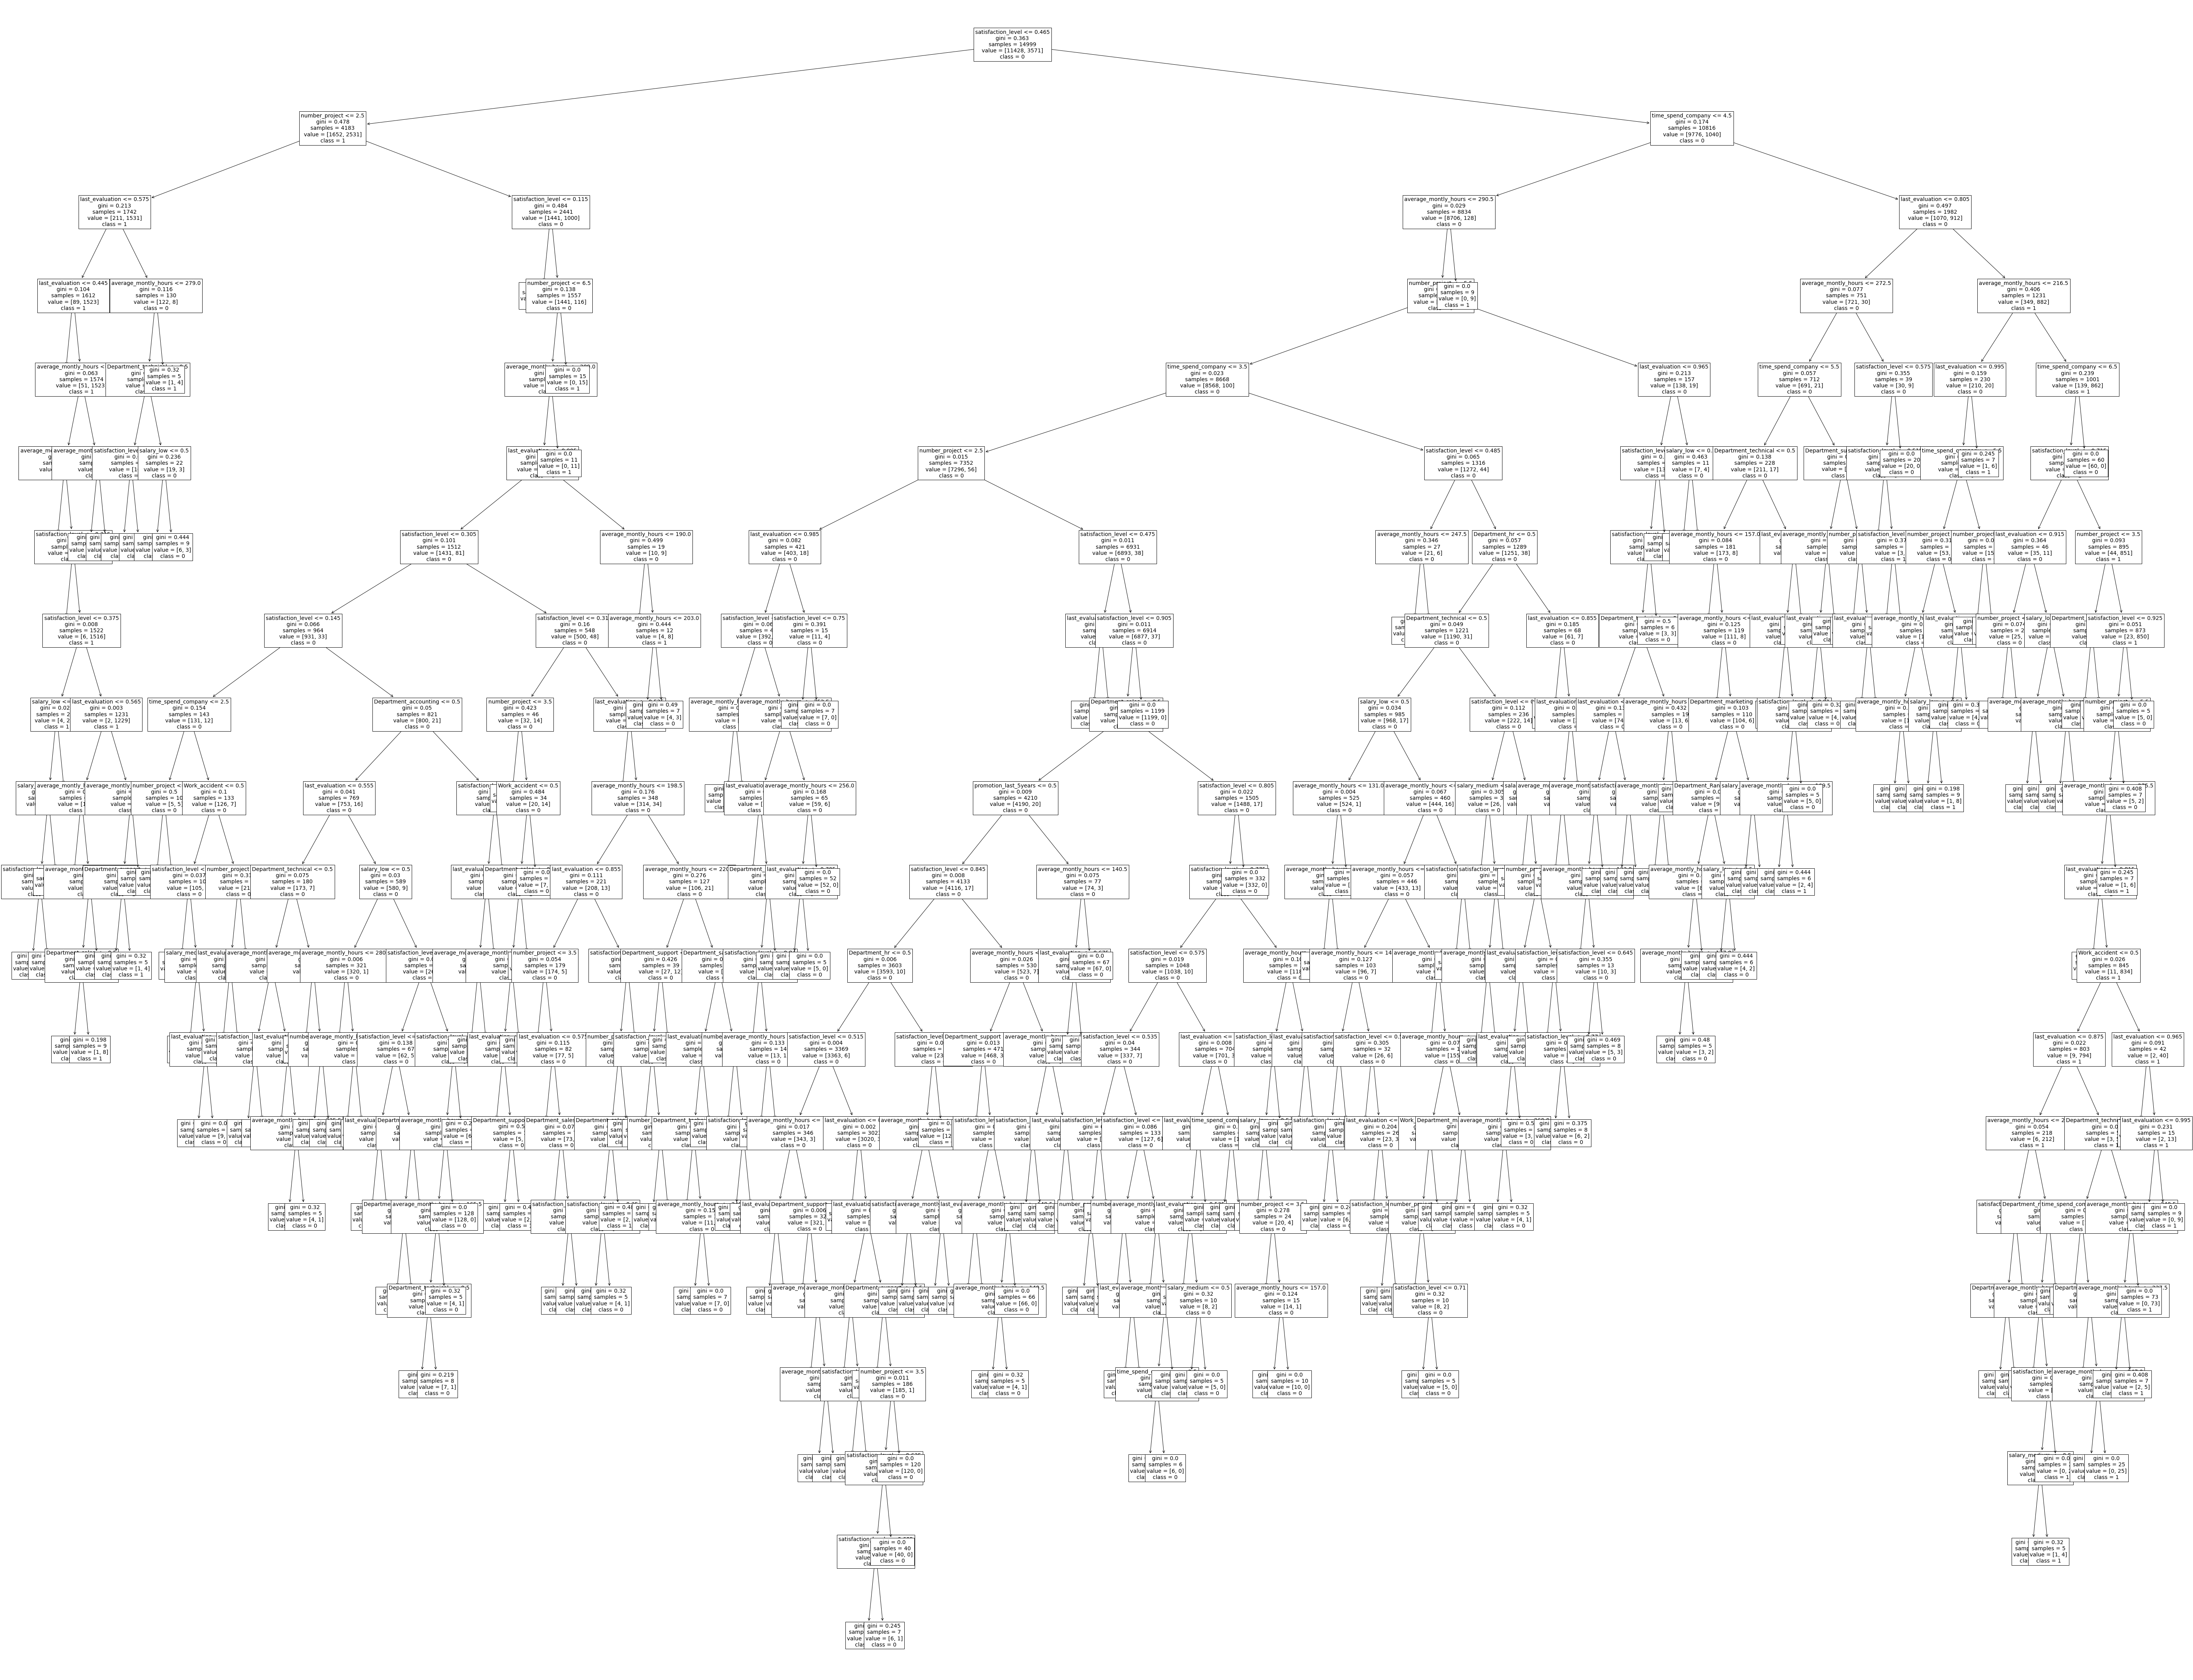

In [ ]:
#best plot
best_model = gcv.best_estimator_
plt.figure(figsize = (100,80))
plot_tree(best_model, feature_names = X.columns, class_names = ['0', '1'], fontsize = 14 )
plt.show()

# Desicion Trees with Bankruptcy Dataset

In [ ]:
# import dataset
# apply dtc
# draw plot for best metrics

bank_path = '/content/gdrive/MyDrive/Datasets/Bankruptcy/Bankruptcy.csv'
Bankruptcy = pd.read_csv(bank_path)
X = Bankruptcy.drop(['NO','YR','D'], axis=1)
y = Bankruptcy['D']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    random_state=2022, train_size=0.7)

dtc = DecisionTreeClassifier(random_state = 2022)
params = {'max_depth':[2,3,4,5, None],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[1,5,10]}
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
gcv = GridSearchCV(dtc, param_grid = params, verbose = 3, cv = kfold, scoring = 'roc_auc')        
gcv.fit(X,y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.808 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.865 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.751 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.947 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.917 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.808 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.865 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.751 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.947 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, m

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=3)

In [ ]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.8730346576500422


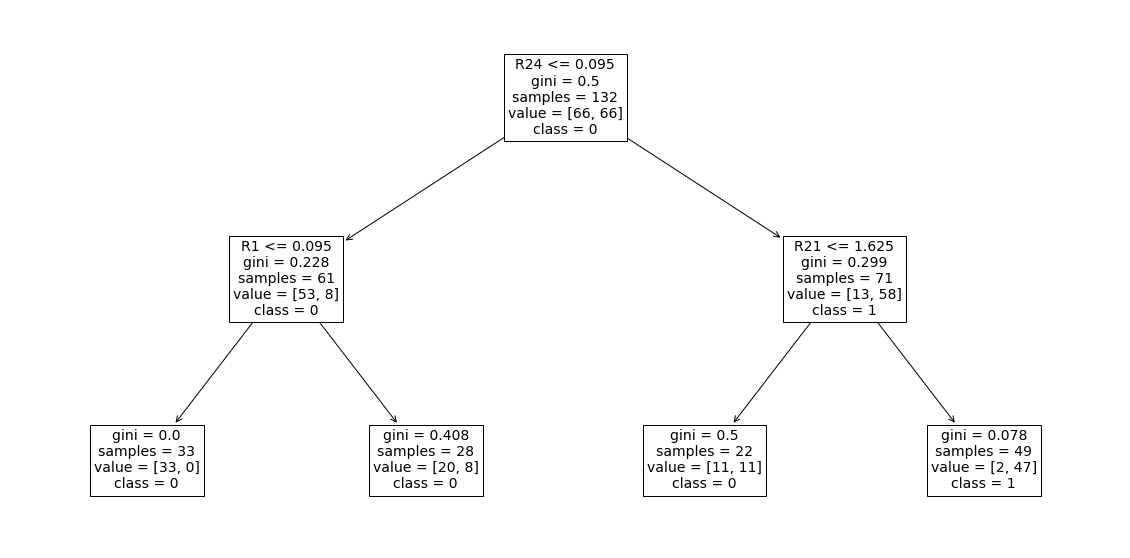

In [ ]:
#best plot
best_model = gcv.best_estimator_
plt.figure(figsize = (20,10))
plot_tree(best_model, feature_names = X.columns, class_names = ['0', '1'], fontsize = 14 )
plt.show()

# Decision Trees with Vehicles Datasets

In [ ]:
from sklearn.preprocessing import LabelEncoder
vehi_path = '/content/gdrive/MyDrive/Datasets/Vehicle Silhouettes/Vehicle.csv'
veh_sil = pd.read_csv(vehi_path)

X = veh_sil.drop('Class',axis=1)
y = veh_sil['Class']

le = LabelEncoder()
le_y = le.fit_transform(y)

dtc = DecisionTreeClassifier(random_state = 2022)
params = {'max_depth':[2,3,4,5, None],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[1,5,10]}
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
gcv = GridSearchCV(dtc, param_grid = params, verbose = 3, cv = kfold, scoring = 'neg_log_loss')        
gcv.fit(X,le_y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-1.050 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-1.008 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.922 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.895 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.943 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-1.050 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-1.008 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.922 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.895 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss', verbose=3)

In [ ]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
-0.9394769812867446


['bus' 'opel' 'saab' 'van']


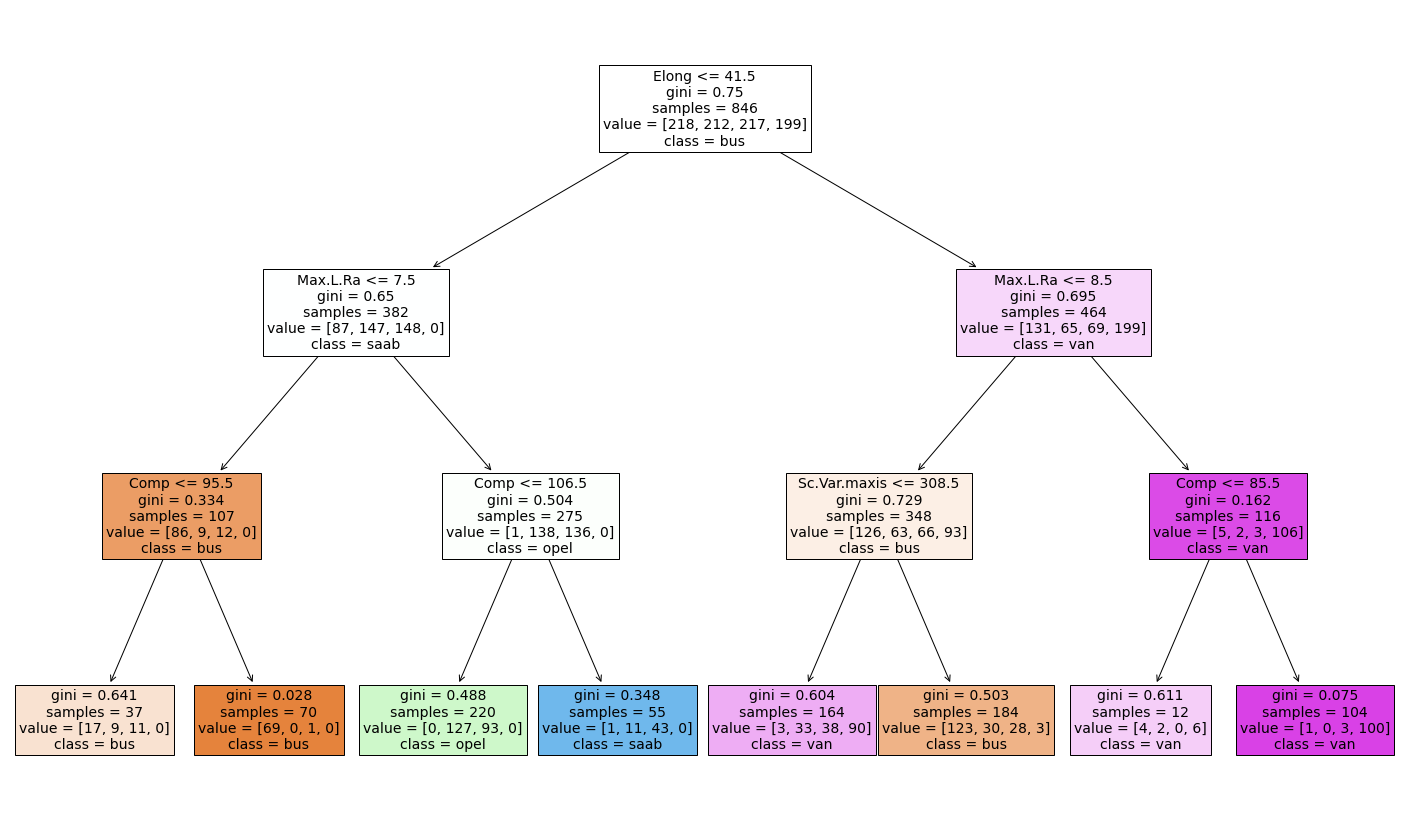

In [ ]:
print(le.classes_)
#best plot
best_model = gcv.best_estimator_
plt.figure(figsize = (25,15))
plot_tree(best_model, feature_names = X.columns, class_names = le.classes_, fontsize = 14 , filled= True)
plt.show()

In [ ]:
print(best_model.feature_names_in_, best_model.feature_names_in_)

['Comp' 'Circ' 'D.Circ' 'Rad.Ra' 'Pr.Axis.Ra' 'Max.L.Ra' 'Scat.Ra' 'Elong'
 'Pr.Axis.Rect' 'Max.L.Rect' 'Sc.Var.Maxis' 'Sc.Var.maxis' 'Ra.Gyr'
 'Skew.Maxis' 'Skew.maxis' 'Kurt.maxis' 'Kurt.Maxis' 'Holl.Ra'] ['Comp' 'Circ' 'D.Circ' 'Rad.Ra' 'Pr.Axis.Ra' 'Max.L.Ra' 'Scat.Ra' 'Elong'
 'Pr.Axis.Rect' 'Max.L.Rect' 'Sc.Var.Maxis' 'Sc.Var.maxis' 'Ra.Gyr'
 'Skew.Maxis' 'Skew.maxis' 'Kurt.maxis' 'Kurt.Maxis' 'Holl.Ra']


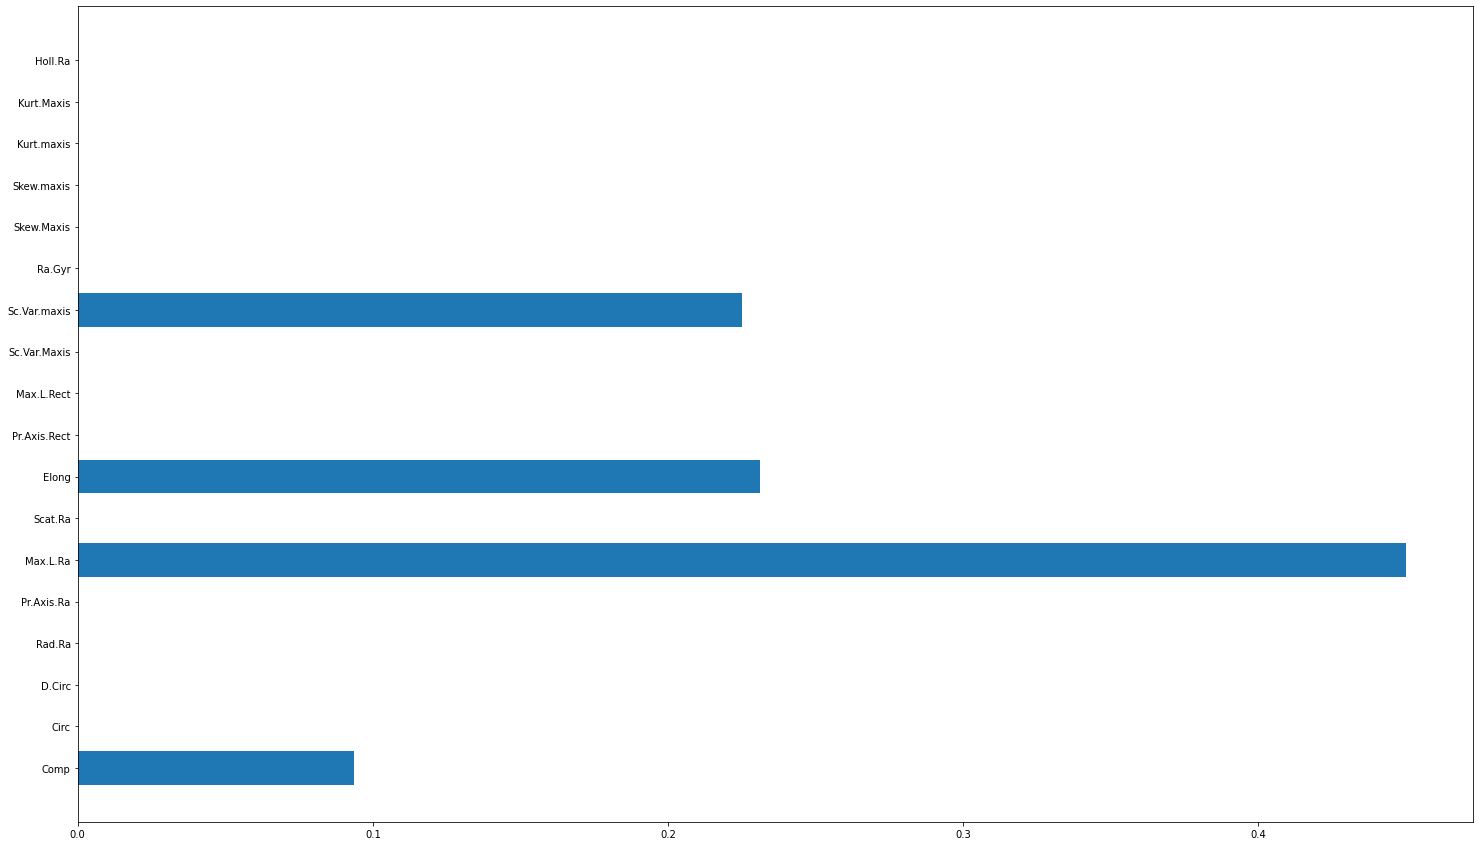

In [ ]:
plt.figure(figsize=(25,15))
plt.barh(best_model.feature_names_in_,best_model.feature_importances_)
plt.show()

# Heart Attack Dataset



In [ ]:
heart_path = '/content/gdrive/MyDrive/Datasets/Heart Attack/heart.csv'
heart = pd.read_csv(heart_path)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.799 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.796 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.916 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.788 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.799 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.796 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.916 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, m

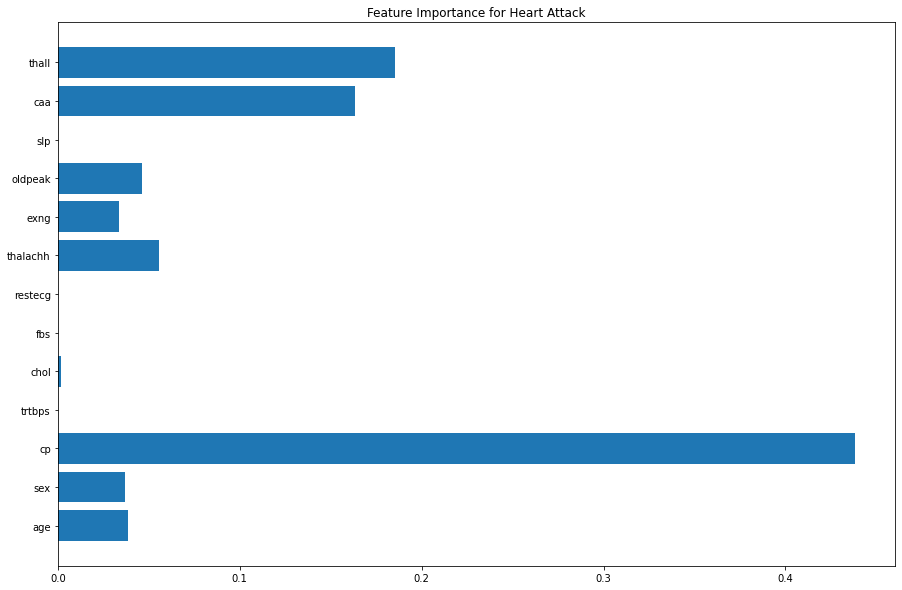

In [ ]:
X = heart.drop('output', axis=1)
y = heart['output']

dtc = DecisionTreeClassifier(random_state = 2022)
params = {'max_depth':[2,3,4,5, None],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[1,5,10]}
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
gcv = GridSearchCV(dtc, param_grid = params, verbose = 3, cv = kfold, scoring = 'roc_auc')   

gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)
best_model = gcv.best_estimator_
plt.figure(figsize=(15,10))
plt.barh(best_model.feature_names_in_,best_model.feature_importances_)
plt.title('Feature Importance for Heart Attack')
plt.show()

# Regression Tree
1. for numerical type
2. mean squared error for evaluation
3. library : 
  ```
     from sklearn.tree import DecisionTreeRegressor 
  ```

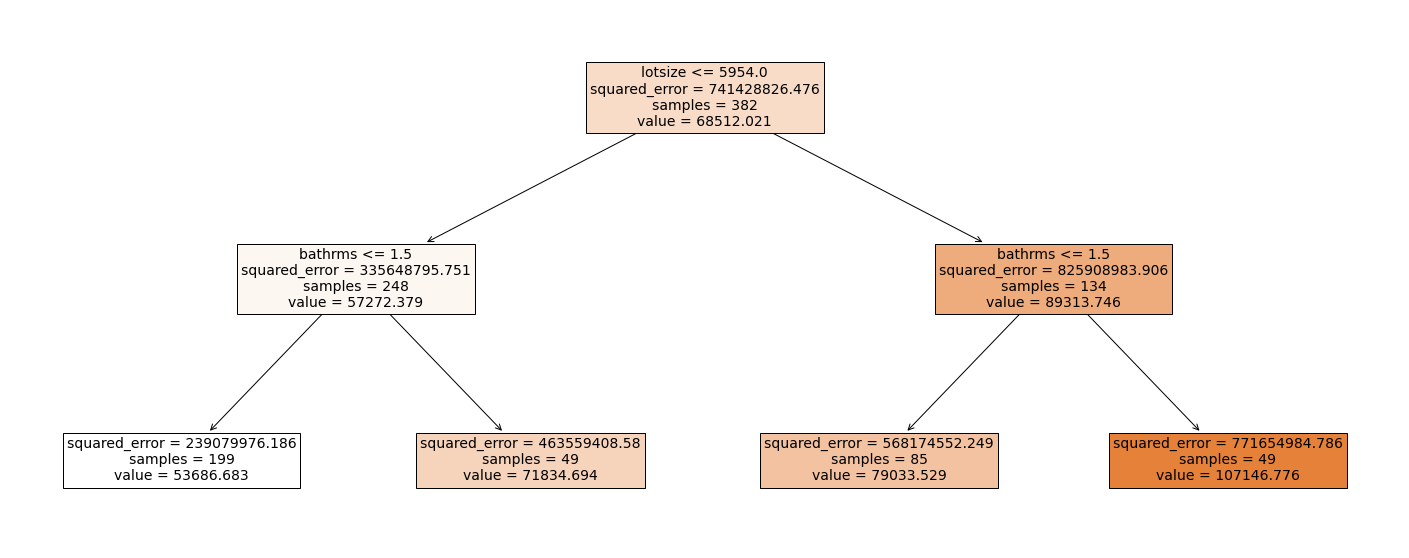

In [ ]:
from sklearn import tree
# starting with Housing Dataset
from sklearn.tree import DecisionTreeRegressor 

house_path = '/content/gdrive/MyDrive/Datasets/Housing.csv'
housing = pd.read_csv(house_path)

dum_house = pd.get_dummies(housing)
X = dum_house.drop('price', axis = 1)
y = dum_house['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022, train_size=0.7)

dtr = DecisionTreeRegressor(random_state = 2022, max_depth = 2)
dtr.fit(X_train, y_train)

plt.figure(figsize=(25,10))
plot_tree(dtr, feature_names = X.columns, filled = True, fontsize = 14 )
plt.show()



Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.518 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.337 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.302 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.403 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.448 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.518 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.337 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.302 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.403 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, m

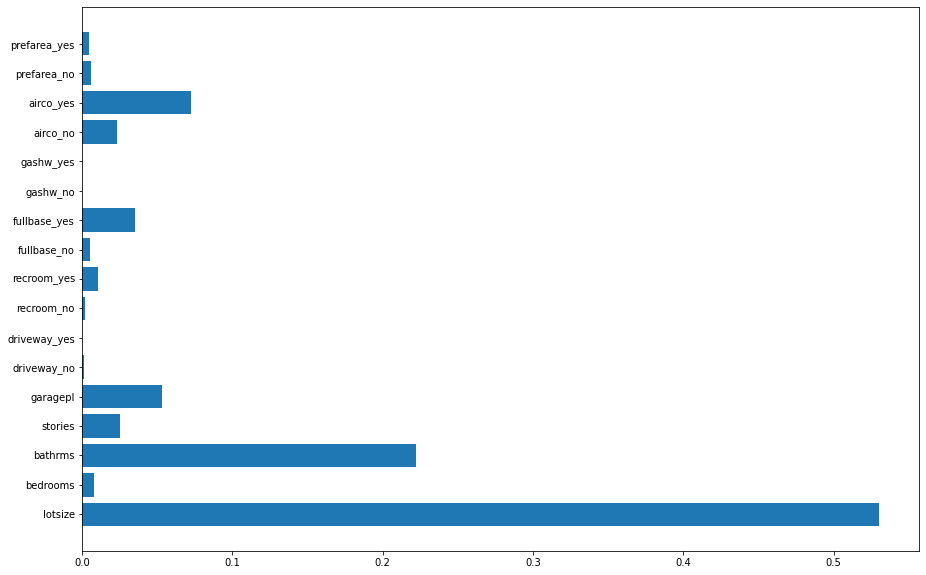

In [ ]:
# GCV for housing dataset
dtr = DecisionTreeRegressor(random_state = 2022, max_depth = 2)
params = {'max_depth':[2,3,4,5, None],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[1,5,10]}
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2022)
gcv = GridSearchCV(dtr, param_grid = params, verbose = 3, cv = kfold, scoring = 'r2')   
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)
best_model = gcv.best_estimator_
plt.figure(figsize=(15,10))
plt.barh(best_model.feature_names_in_,best_model.feature_importances_)
plt.show()

# Tree Regressor with Concrete Strength
1. find r2
2. find important top 3 features

In [ ]:
con_path = '/content/gdrive/MyDrive/Datasets/Concrete_Data.csv'
concrete = pd.read_csv(con_path)
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly               1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse            1030 non-null   float64
 6   Fine              1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.425 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.441 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.453 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.498 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.487 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.425 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.441 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.453 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.498 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, m

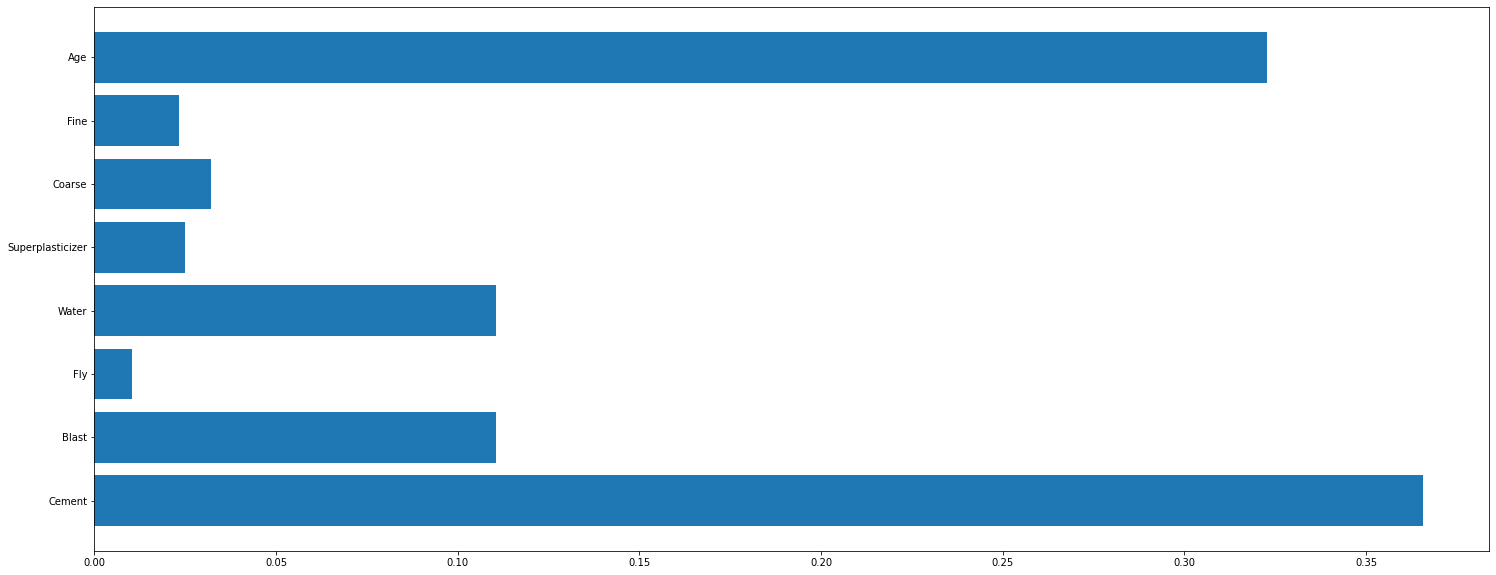

In [ ]:
X = concrete.drop('Strength', axis =1 )
y = concrete['Strength']

# GCV for concrete
dtr = DecisionTreeRegressor(random_state = 2022, max_depth = 2)
params = {'max_depth':[2,3,4,5, None],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[1,5,10]}
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2022)
gcv = GridSearchCV(dtr, param_grid = params, verbose = 3, cv = kfold, scoring = 'r2')   
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)
best_model = gcv.best_estimator_
plt.figure(figsize=(25,10))
plt.barh(best_model.feature_names_in_,best_model.feature_importances_)
plt.title('Feature Importance for Concrete')
plt.show()

Results: 

> r2 = 0.85

> top 3: 
1. cement
2. age
3. water/blast

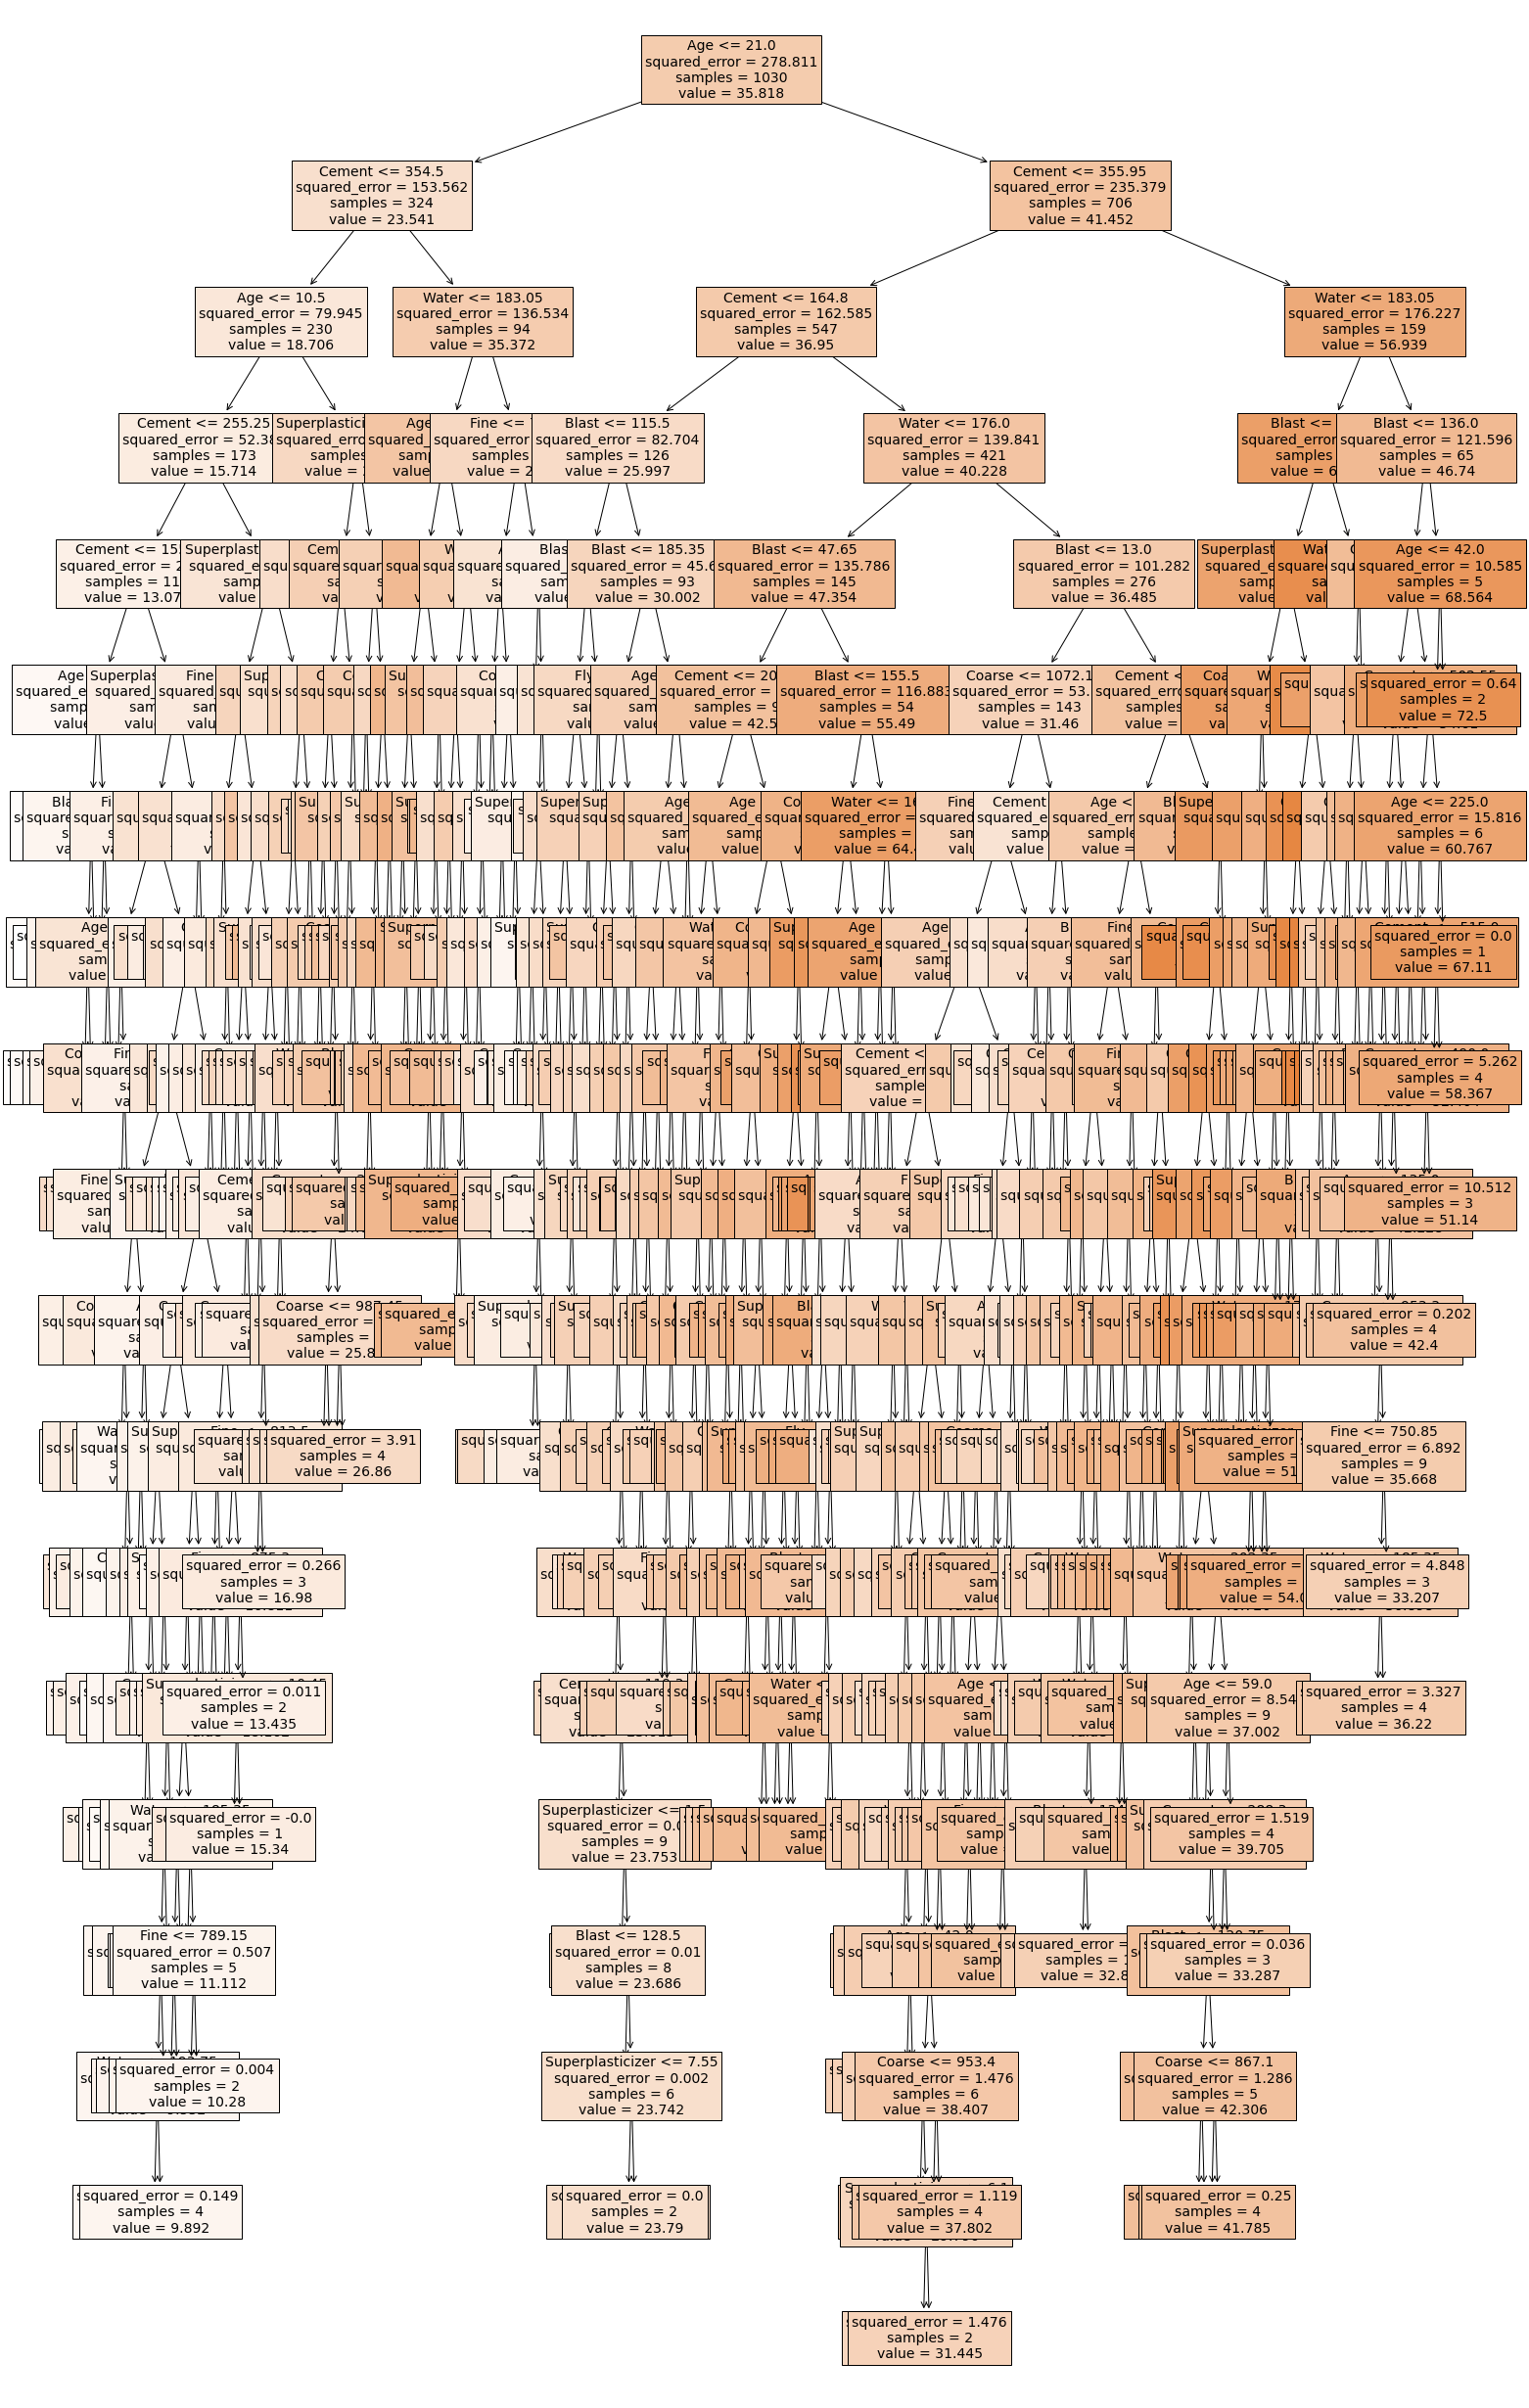

In [ ]:
best_model = gcv.best_estimator_
plt.figure(figsize=(25,45))
plot_tree(best_model, feature_names = X.columns, filled = True, fontsize = 14 )
plt.show()

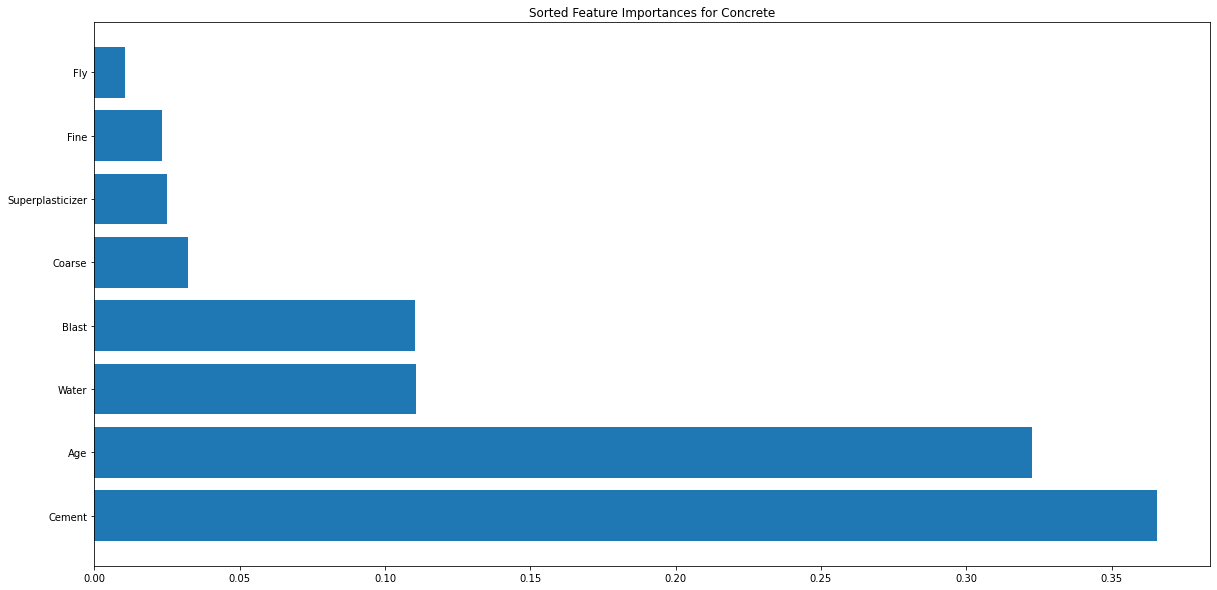

In [ ]:
# sorting the importances
imps = best_model.feature_importances_
i_sorted = np.argsort(-imps)
n_sorted = X.columns[i_sorted]
imp_sorted = imps[i_sorted]

plt.figure(figsize=(20,10))
plt.barh(n_sorted,imp_sorted)
plt.title('Sorted Feature Importances for Concrete')
plt.show()